# Task - 2
A hospital wants to build a machine learning system that can help doctors predict whether a patient has breast cancer (malignant or benign) based on medical test features.
Your task is to:
Build multiple classification models
Compare single models vs ensemble models
Evaluate model performance using confusion matrix and evaluation metrics
Decide which model is most reliable for real-world medical use

In [1]:
# Load libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb
# load dataset
from sklearn.datasets import load_breast_cancer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#load models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Evaluation metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix, classification_report

In [2]:
# make dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data,columns = [data.feature_names])
df['Target'] = data.target

# Check statistics about data

In [3]:
# view dataset 
df.sample(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
395,14.060,17.18,89.75,609.1,0.08045,0.05361,0.02681,0.03251,0.1641,0.05764,...,25.34,96.42,684.5,0.10660,0.1231,0.0846,0.07911,0.2523,0.06609,1
284,12.890,15.70,84.08,516.6,0.07818,0.09580,0.11150,0.03390,0.1432,0.05935,...,19.69,92.12,595.6,0.09926,0.2317,0.3344,0.10170,0.1999,0.07127,1
547,10.260,16.58,65.85,320.8,0.08877,0.08066,0.04358,0.02438,0.1669,0.06714,...,22.04,71.08,357.4,0.14610,0.2246,0.1783,0.08333,0.2691,0.09479,1
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.18530,1.0580,1.1050,0.22100,0.4366,0.20750,0
459,9.755,28.20,61.68,290.9,0.07984,0.04626,0.01541,0.01043,0.1621,0.05952,...,36.92,68.03,349.9,0.11100,0.1109,0.0719,0.04866,0.2321,0.07211,1


In [4]:
# check descriptive statistics about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   (mean radius,)              569 non-null    float64
 1   (mean texture,)             569 non-null    float64
 2   (mean perimeter,)           569 non-null    float64
 3   (mean area,)                569 non-null    float64
 4   (mean smoothness,)          569 non-null    float64
 5   (mean compactness,)         569 non-null    float64
 6   (mean concavity,)           569 non-null    float64
 7   (mean concave points,)      569 non-null    float64
 8   (mean symmetry,)            569 non-null    float64
 9   (mean fractal dimension,)   569 non-null    float64
 10  (radius error,)             569 non-null    float64
 11  (texture error,)            569 non-null    float64
 12  (perimeter error,)          569 non-null    float64
 13  (area error,)               569 non

In [5]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [6]:
# split features
X = df.drop(columns = ['Target'])
y = df['Target']


C:\Users\rajka\AppData\Local\Temp\ipykernel_9664\3591306121.py:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X = df.drop(columns = ['Target'])


(Target,)
1            357
0            212
Name: count, dtype: int64


<Axes: xlabel='(Target,)'>

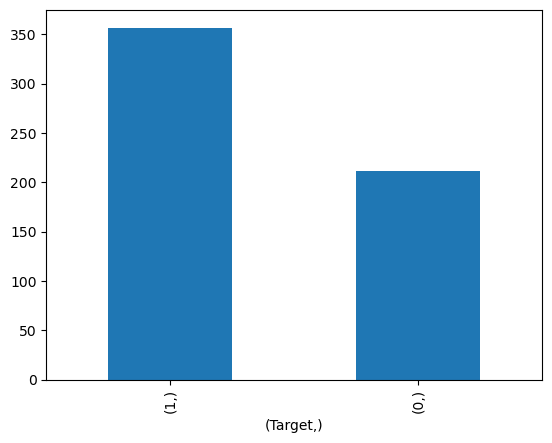

In [7]:
# Check distribution of classes in target 
print(y.value_counts())
y.value_counts().plot(kind= 'bar')

1 -> person having breast cancer
0 ->person not having breast cancer


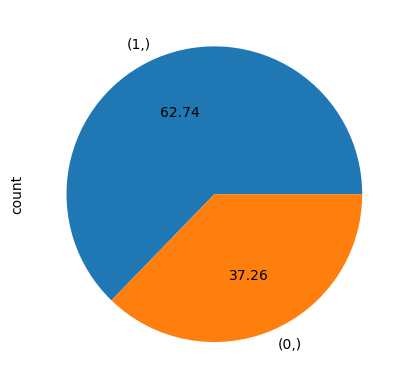

In [8]:
# check percentage of the patients having breast cancer or not having
y.value_counts().plot(kind ='pie',autopct = '%.2f')
print('1 -> person having breast cancer')
print('0 ->person not having breast cancer')

# Create Models

In [9]:
# split data inot training and testing
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42,stratify = y)

In [11]:
# make y to 1d array
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [12]:
# Scale data for Logisitc Regression model
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [13]:
# make models
lr = LogisticRegression(penalty = 'l2',solver ='lbfgs',C = 0.5)  # add regularization to prevent from overfitting
dt = DecisionTreeClassifier(max_depth = 5,random_state = 42,criterion = 'gini')
dt_2 = DecisionTreeClassifier(max_depth =5,random_state = 42,criterion ='entropy')  # another decision tree with different criterion
rf = RandomForestClassifier(n_estimators =200,random_state =42)

In [14]:
# train models 
lr.fit(x_train_scaled,y_train)
dt.fit(x_train,y_train)
dt_2.fit(x_train,y_train)
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [15]:
# make predictions on unseen data
lr_pred = lr.predict(x_test_scaled)
dt_pred = dt.predict(x_test)
dt_2_pred = dt_2.predict(x_test)
rf_pred = rf.predict(x_test)

In [16]:
# check probability score
lr_prob = lr.predict_proba(x_test_scaled)[:,1]
dt_prob = dt.predict_proba(x_test)[:,1]
dt_2_prob = dt_2.predict_proba(x_test)[:,1]
rf_prob = rf.predict_proba(x_test)[:,1]

In [17]:
# Make an evaluation function 
def evaluate_model(name,y_test,y_pred,y_prob):
    print(f'\n\n{name} Evaluation\n')
    print('Accuracy :',accuracy_score(y_test,y_pred))
    print('Precision:',precision_score(y_test,y_pred))
    print('Recall:',recall_score(y_test,y_pred))
    print('F1 score:',f1_score(y_test,y_pred))
    print('ROC - AUC:', roc_auc_score(y_test,y_prob))
    print('\nConfusion Matrix:\n',confusion_matrix(y_test,y_pred))
    print('\nClassification Report:\n',classification_report(y_test,y_pred))
    

# Evaluation of models

### Evaluation of Logistic Regression

In [18]:
#Evaluation 
evaluate_model('Logistic Regression',y_test,lr_pred,lr_prob)



Logistic Regression Evaluation

Accuracy : 0.9824561403508771
Precision: 0.9861111111111112
Recall: 0.9861111111111112
F1 score: 0.9861111111111112
ROC - AUC: 0.9957010582010581

Confusion Matrix:
 [[41  1]
 [ 1 71]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



about logistic regression model
- total patients tested = 114
- patients who have actually breat cancer = 42
- model predict patients have actually breast cancer = 41 
- Error = 1%
- accuracy = 98 %
- precision  = recall = f1 _score = 98 %
- precision summary = from all  predicted cancer patients ,actually only 1 patient not have breast cancer, model miss classify it as having breast cancer
- recall summary = Out of all actuall Positive patients , model only miss classify 1 patient as not having cancer which actually have 

### Evaluation of Decision Tree 1

In [19]:
evaluate_model('Decision Tree 1',y_test,dt_pred,dt_prob)



Decision Tree 1 Evaluation

Accuracy : 0.9210526315789473
Precision: 0.9565217391304348
Recall: 0.9166666666666666
F1 score: 0.9361702127659575
ROC - AUC: 0.9163359788359788

Confusion Matrix:
 [[39  3]
 [ 6 66]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90        42
           1       0.96      0.92      0.94        72

    accuracy                           0.92       114
   macro avg       0.91      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114



about Decision Tree model 1
- total patients tested = 114
- patients who have actually breat cancer = 42
- model predict patients have actually breast cancer = 39
- Error Rate = 8%
- accuracy = 92%
- precision summary = from all predicted cancer patients , actually 6 patients having no breast cancer,model miss classify them as having breast cancer
- recall summary = Out of all actual positive patients , model only miss classify 3 patients as not to be having brest cancer

### Evaluation of Decision Tree 2

In [20]:
evaluate_model('Decision Tree 2',y_test,dt_2_pred,dt_2_prob)



Decision Tree 2 Evaluation

Accuracy : 0.9298245614035088
Precision: 0.9705882352941176
Recall: 0.9166666666666666
F1 score: 0.9428571428571428
ROC - AUC: 0.9434523809523808

Confusion Matrix:
 [[40  2]
 [ 6 66]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91        42
           1       0.97      0.92      0.94        72

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



about Decision Tree model 2
- total patients tested = 114
- patients who have actually breat cancer = 42
- model predict patients have actually breast cancer = 39
- Error Rate = 7%
- accuracy = 93%
- precision summary = from all predicted cancer patients , actually 6 patients having no breast cancer, model miss classify them as having breast cancer
- recall summary = Out of all actual positive cancer patients , model only miss classify 2 patients as not to be having brest cancer

### Evaluation of Random Forest

In [21]:
evaluate_model('Random Forest',y_test,rf_pred,rf_prob)



Random Forest Evaluation

Accuracy : 0.956140350877193
Precision: 0.958904109589041
Recall: 0.9722222222222222
F1 score: 0.9655172413793104
ROC - AUC: 0.9930555555555556

Confusion Matrix:
 [[39  3]
 [ 2 70]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



about Random Forest model 
- total patients tested = 114
- patients who have actually breat cancer = 42
- model predict patients have actually breast cancer = 39
- Error Rate = 4%
- accuracy = 96%
- precision summary = from all predicted cancer patients , actually 2 patients having no breast cancer, model miss classify them as having breast cancer
- recall summary = Out of all actual positive cancer patients , model only miss classify 3 patients as not to be having brest cancer

# Final Best Model Ranking
- 1st - Logistic Regresiion Model = miss classify only 1 patient as not to be cancer but actually having
- 2nd - Decision Tree 2 = miss classify only 2 patients
- 3rd = Random Forest = miss classify 3 patients
- 4th = Decision Tree 1 = miss classiy 3 patients,but accuracy is less